In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e4/sample_submission.csv
/kaggle/input/playground-series-s5e4/train.csv
/kaggle/input/playground-series-s5e4/test.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1. Data  

## Preparations

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')
sample_sub = pd.read_csv('/kaggle/input/playground-series-s5e4/sample_submission.csv')

In [4]:
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)

In [5]:
train_df

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000


In [6]:
sample_sub

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437
...,...,...
249995,999995,45.437
249996,999996,45.437
249997,999997,45.437
249998,999998,45.437


In [7]:
print(train_df.columns)
print(test_df.columns)

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')
Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment'],
      dtype='object')


In [8]:
target = 'Listening_Time_minutes'

## Exploratory Analysis

We first look at the missing values in the columns.

In [9]:
missing_value_table = pd.DataFrame(columns=['Feature', 'Data Type', 'Train Missing %', 'Test Missing %',
                                            'Discrete ratio (Train)'])
for column in train_df.columns:
    data_type = str(train_df[column].dtype)

    # Calculate missing value percentage
    null_train = (1 - train_df[column].count() / train_df[column].shape[0]) * 100 # Counted in percantage
    if column != target:
        null_test = (1 - test_df[column].count() / test_df[column].shape[0]) * 100
    else:
        null_test = "N/A"

    # Calculate discrete ratio
    discrete_ratio = train_df[column].nunique() / train_df[column].shape[0]

    missing_value_table.loc[len(missing_value_table)] = {
        'Feature' : column,
        'Data Type' : data_type,
        'Train Missing %' : null_train,
        'Test Missing %' : null_test,
        'Discrete ratio (Train)' : discrete_ratio
    }

missing_value_table

,Feature,Data Type,Train Missing %,Test Missing %,Discrete ratio (Train)
0,Podcast_Name,object,0.000000,0.0,0.000064
1,Episode_Title,object,0.000000,0.0,0.000133
2,Episode_Length_minutes,float64,11.612400,11.4944,0.016357
3,Genre,object,0.000000,0.0,0.000013
4,Host_Popularity_percentage,float64,0.000000,0.0,0.010717
5,Publication_Day,object,0.000000,0.0,0.000009
6,Publication_Time,object,0.000000,0.0,0.000005
7,Guest_Popularity_percentage,float64,19.470667,19.5328,0.013359
8,Number_of_Ads,float64,0.000133,0.0,0.000016
9,Episode_Sentiment,object,0.000000,0.0,0.000004


We want to further explore the unique values of those string columns

In [10]:
test_df['Podcast_Name'].value_counts()

Podcast_Name
Tech Talks             7553
Sports Weekly          6633
Funny Folks            6621
Fitness First          6543
Style Guide            6469
Business Insights      6448
Tech Trends            6446
Melody Mix             6357
Game Day               6345
Criminal Minds         5980
Crime Chronicles       5867
Finance Focus          5859
Detective Diaries      5799
Fashion Forward        5787
Tune Time              5733
Lifestyle Lounge       5688
Business Briefs        5685
Athlete's Arena        5662
Humor Hub              5476
Sports Central         5424
True Crime Stories     5417
Mystery Matters        5268
Comedy Corner          5258
Digital Digest         5246
Joke Junction          5039
Wellness Wave          4948
Home & Living          4933
Laugh Line             4906
Gadget Geek            4849
Sport Spot             4844
Life Lessons           4823
Sound Waves            4689
Global News            4625
Mind & Body            4581
World Watch            4556
Current

In [11]:
str_cols = [f for f in train_df.columns if train_df[f].dtype == 'O']

for col in str_cols:
    print('Column: {}'.format(col))
    print('Number of unique values: {}'.format(train_df[col].nunique()))
    print('Unique Value:\n{}\n'.format(train_df[col].value_counts()))

Column: Podcast_Name
Number of unique values: 48
Unique Value:
Podcast_Name
Tech Talks             22847
Sports Weekly          20053
Funny Folks            19635
Tech Trends            19549
Fitness First          19488
Business Insights      19480
Style Guide            19364
Game Day               19272
Melody Mix             18889
Criminal Minds         17735
Finance Focus          17628
Detective Diaries      17452
Crime Chronicles       17374
Athlete's Arena        17327
Fashion Forward        17280
Tune Time              17254
Business Briefs        17012
Lifestyle Lounge       16661
True Crime Stories     16373
Sports Central         16191
Digital Digest         16171
Humor Hub              16144
Mystery Matters        16002
Comedy Corner          15927
Joke Junction          15074
Wellness Wave          15009
Sport Spot             14778
Gadget Geek            14770
Home & Living          14686
Laugh Line             14673
Life Lessons           14464
World Watch            14

Afterwards, we can have a look at the relationship between numerical features and the target variable though scatter plot.

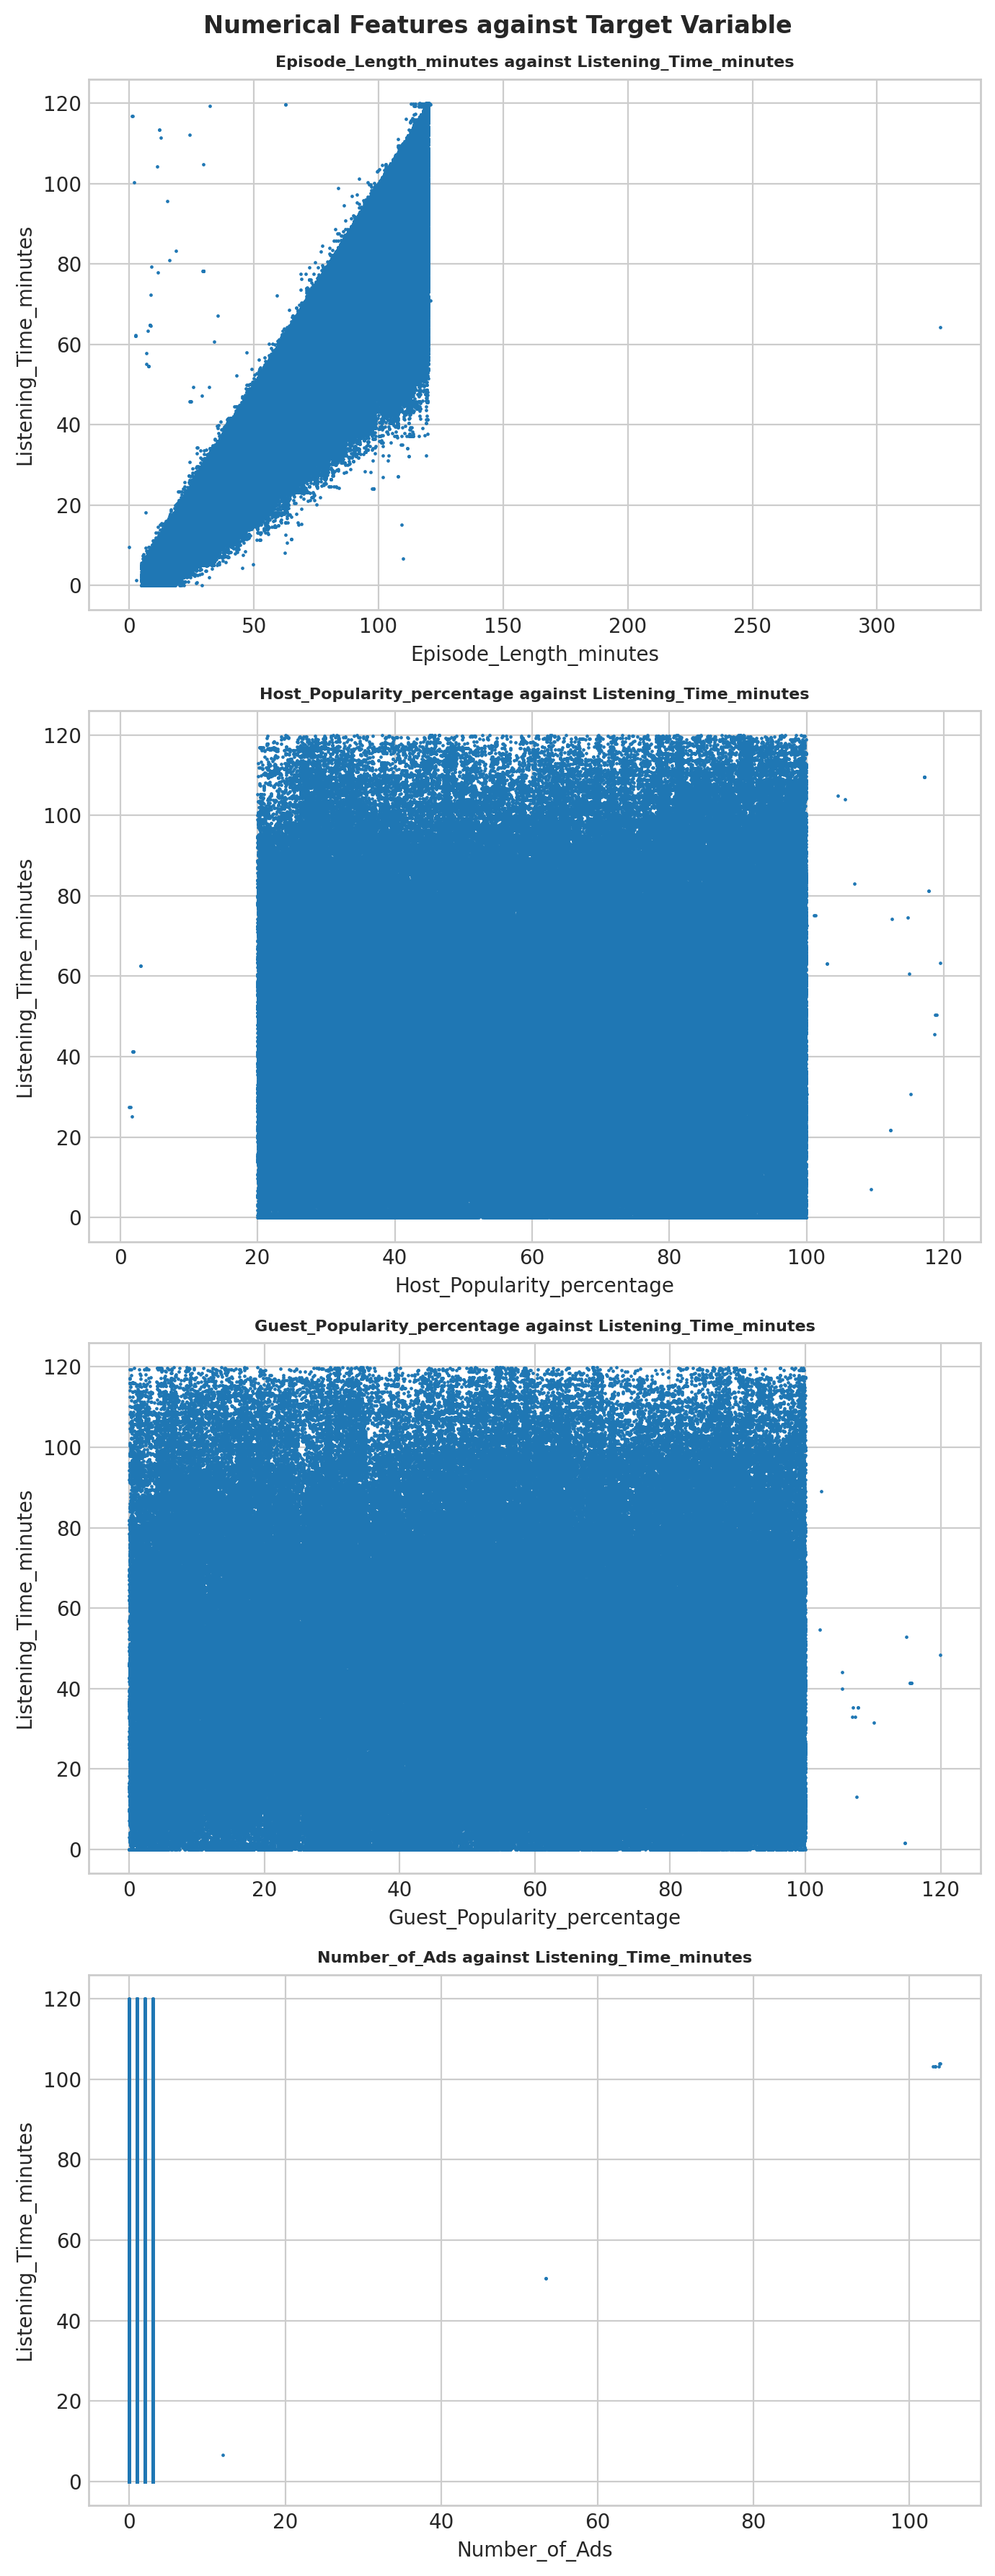

In [12]:
# Set figure style
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# get numerical features
cont_cols = [f for f in train_df.columns if train_df[f].dtype != 'O' and train_df[f].nunique()>2 and
            f != target]
n_rows = len(cont_cols)

# get axes and figure object
fig, axes = plt.subplots(n_rows, 1, figsize=(7, 4.5 * n_rows), dpi=200)

# creating scatter plots
for i, col in enumerate(cont_cols):
    axes[i].scatter(
        x=train_df[col],
        y=train_df[target],
        s=0.5
    )
    axes[i].set_title(f'{col} against {target}', fontsize=8, weight='bold')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel(f'{target}')

fig.suptitle('Numerical Features against Target Variable', weight='bold', y=0.99)
fig.tight_layout()
plt.show()

It is difficult identify relational information from the scatter plot, but we do identify outliers of the dataset. Since the number of the outliers is very small compared to the number of samples, we can cut the samples with outliers off.

In [13]:
# Episode_Length_minutes of larger than 150 is an outlier
train_df = train_df[(train_df['Episode_Length_minutes']<=150) | 
                    train_df['Episode_Length_minutes'].isna()]

# Host_Popularity_percentage should fall into 20~100
train_df = train_df[((train_df['Host_Popularity_percentage']>=20) & 
                    (train_df['Host_Popularity_percentage']<=100)) | 
                    train_df['Host_Popularity_percentage'].isna()]

# Guest_Popularity_percentage should fall into 0~100
train_df = train_df[((train_df['Guest_Popularity_percentage']>=0) &
                    (train_df['Guest_Popularity_percentage']<=100)) |
                    train_df['Guest_Popularity_percentage'].isna()]

# Number_of_Ads should not be larger than 10
train_df = train_df[(train_df['Number_of_Ads']<=10) | train_df['Number_of_Ads'].isna()]

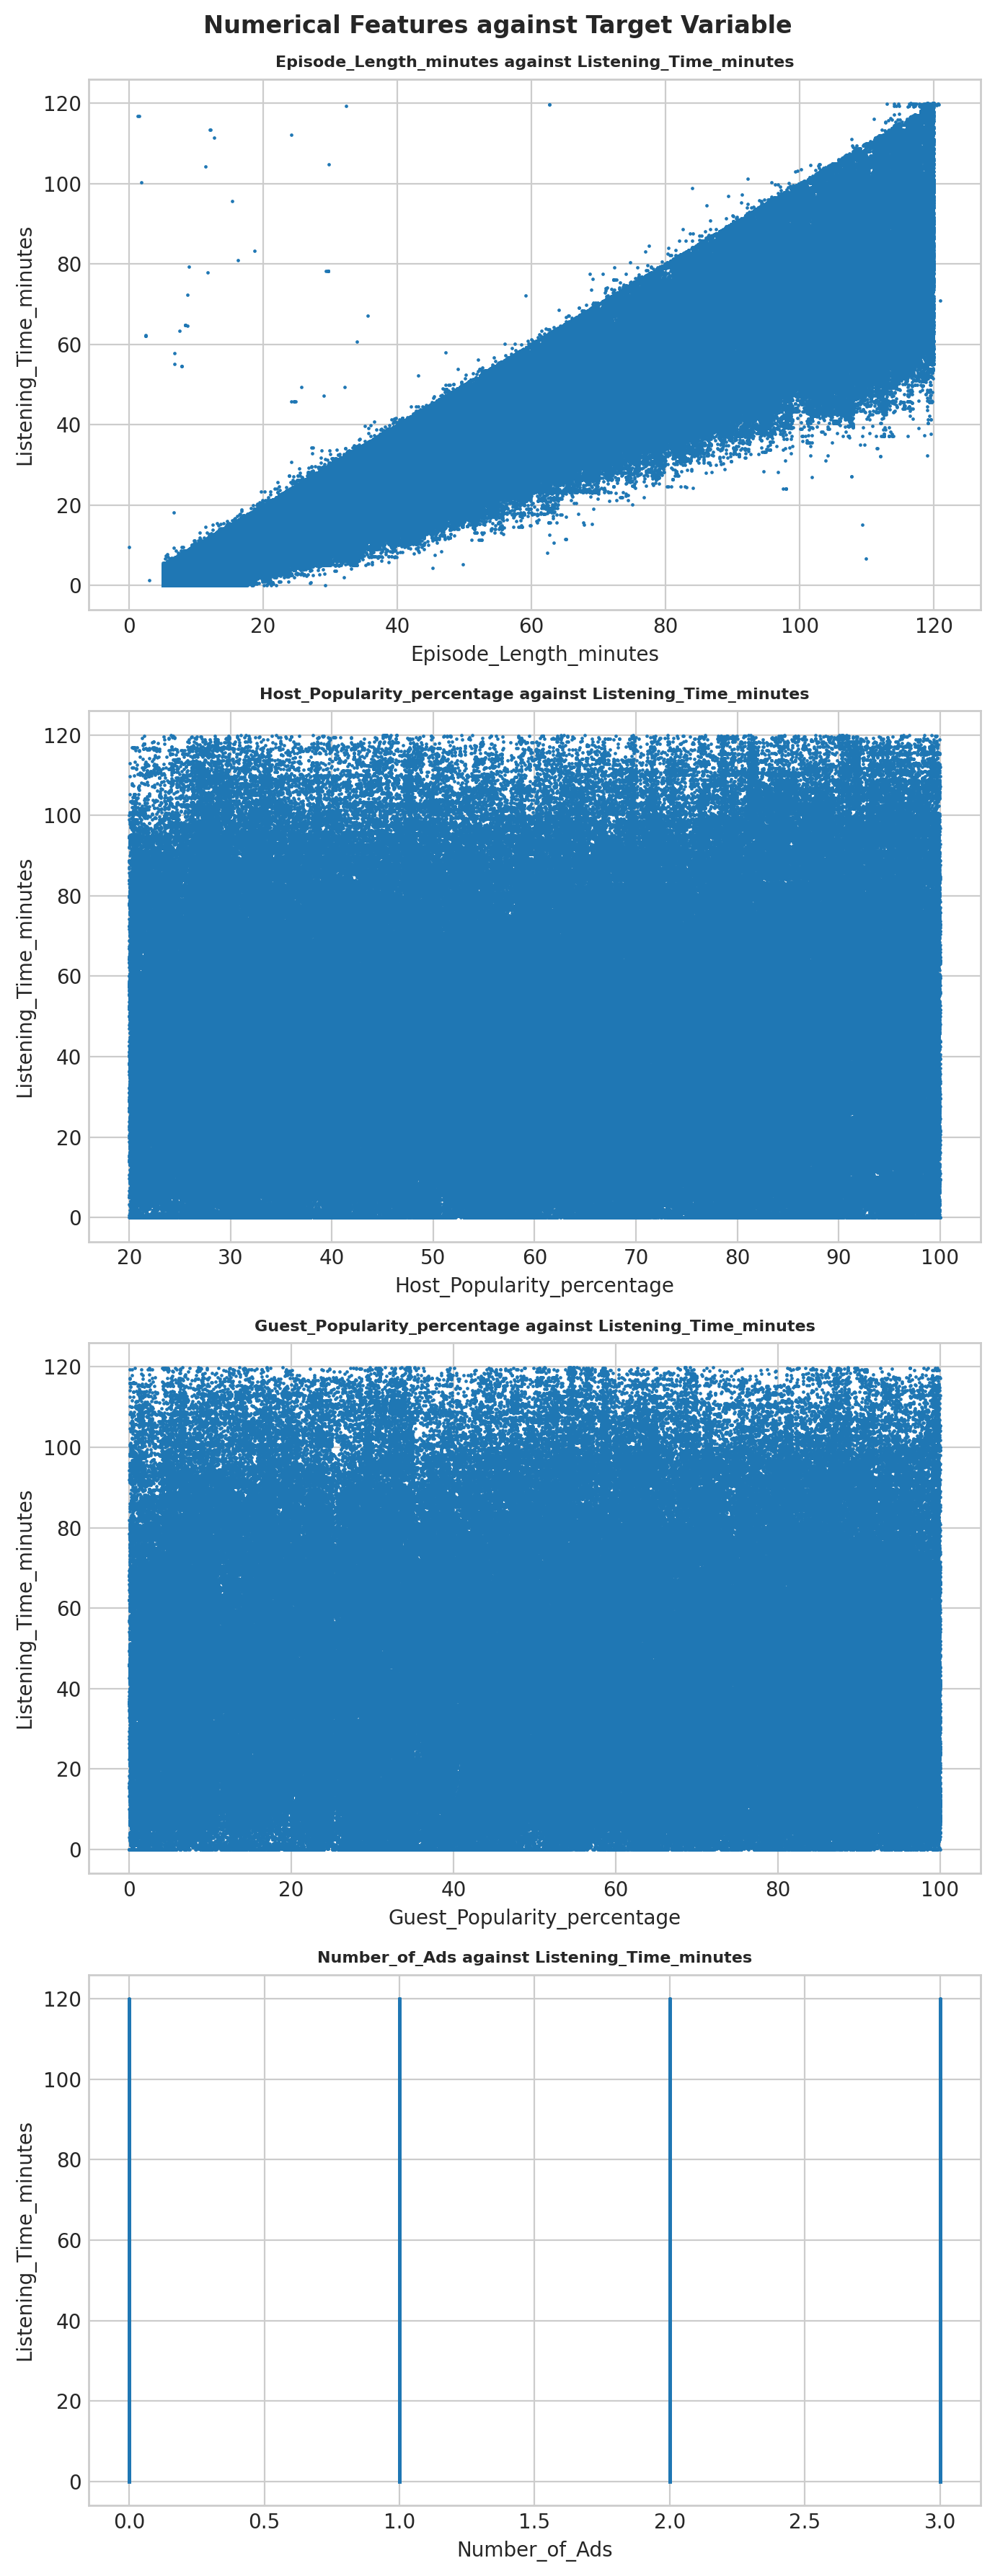

In [14]:
# Recheck if the outliers are correctly cut off
# get axes and figure object
fig, axes = plt.subplots(n_rows, 1, figsize=(7, 4.5 * n_rows), dpi=200)

# creating scatter plots
for i, col in enumerate(cont_cols):
    axes[i].scatter(
        x=train_df[col],
        y=train_df[target],
        s=0.5
    )
    axes[i].set_title(f'{col} against {target}', fontsize=8, weight='bold')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel(f'{target}')

fig.suptitle('Numerical Features against Target Variable', weight='bold', y=0.99)
fig.tight_layout()
plt.show()

We also do the same outlier cutting off to test set.

In [15]:
# Episode_Length_minutes of larger than 130 is an outlier
test_df = test_df[(test_df['Episode_Length_minutes']<=130) | 
                    test_df['Episode_Length_minutes'].isna()]

# Host_Popularity_percentage should fall into 20~100
test_df = test_df[((test_df['Host_Popularity_percentage']>=20) & 
                    (test_df['Host_Popularity_percentage']<=100)) | 
                    test_df['Host_Popularity_percentage'].isna()]

# Guest_Popularity_percentage should fall into 0~100
test_df = test_df[((test_df['Guest_Popularity_percentage']>=0) &
                    (test_df['Guest_Popularity_percentage']<=100)) |
                    test_df['Guest_Popularity_percentage'].isna()]

# Number_of_Ads should not be larger than 5
test_df = test_df[(test_df['Number_of_Ads']<=5) | test_df['Number_of_Ads'].isna()]

# 2. Feature Engineering

First, we need to make some adjustments on string features. Here we consider applying label encoder to all the string columns.

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
for col in str_cols:
    le.fit(train_df[col])
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
train_df

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,34,98,NaN,9,74.81,4,3,NaN,0.0,2,31.41998
1,24,19,119.80,1,66.95,2,0,75.95,2.0,0,88.01241
2,40,8,73.90,2,69.97,5,1,8.97,0.0,0,44.92531
3,10,40,67.17,8,57.22,1,2,78.70,2.0,2,46.27824
4,31,85,110.51,3,80.07,1,0,58.68,3.0,1,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
749995,26,18,75.66,2,69.36,2,2,NaN,0.0,0,56.87058
749996,2,14,75.75,0,35.21,2,3,NaN,2.0,1,45.46242
749997,28,47,30.98,4,78.58,4,2,84.89,0.0,0,15.26000


In [18]:
test_df

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
id,,,,,,,,,,
750000,11,71,78.96,2,38.11,2,1,53.33,1.0,1
750001,36,16,27.87,5,71.29,3,2,NaN,0.0,1
750002,24,3,69.10,1,67.89,0,1,97.51,0.0,2
750003,4,71,115.39,1,23.40,3,2,51.75,2.0,2
750004,27,46,72.32,4,58.10,6,2,11.30,2.0,1
...,...,...,...,...,...,...,...,...,...,...
999995,31,2,21.05,3,65.77,2,1,96.40,3.0,0
999996,24,84,85.50,1,41.47,2,3,30.52,2.0,0
999997,24,60,12.11,1,25.92,4,1,73.69,1.0,1


Next, we deal with NaNs in the dataframe. According to exloratory analysis on the dataset, there are approximately same portion of missing values in train data and test data. All missing values are in columns Episode_Length_minutes, Number_of_Ads and Guest_Popularity_percentage.  
Here we will use SimpleImputer.

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(strategy='median')
col_mv = ['Episode_Length_minutes', 'Guest_Popularity_percentage', 'Number_of_Ads'] # columns with missing values
imputer.fit(train_df[col_mv])
train_df[col_mv] = imputer.transform(train_df[col_mv])
test_df[col_mv] = imputer.transform(test_df[col_mv])

In [21]:
# Run the same code again to check if we have handled the missing values
missing_value_table = pd.DataFrame(columns=['Feature', 'Data Type', 'Train Missing %', 'Test Missing %',
                                            'Discrete ratio (Train)'])
for column in train_df.columns:
    data_type = str(train_df[column].dtype)

    # Calculate missing value percentage
    null_train = (1 - train_df[column].count() / train_df[column].shape[0]) * 100 # Counted in percantage
    if column != target:
        null_test = (1 - test_df[column].count() / test_df[column].shape[0]) * 100
    else:
        null_test = "N/A"

    # Calculate discrete ratio
    discrete_ratio = train_df[column].nunique() / train_df[column].shape[0]

    missing_value_table.loc[len(missing_value_table)] = {
        'Feature' : column,
        'Data Type' : data_type,
        'Train Missing %' : null_train,
        'Test Missing %' : null_test,
        'Discrete ratio (Train)' : discrete_ratio
    }

missing_value_table

,Feature,Data Type,Train Missing %,Test Missing %,Discrete ratio (Train)
0,Podcast_Name,int64,0.0,0.0,0.000064
1,Episode_Title,int64,0.0,0.0,0.000133
2,Episode_Length_minutes,float64,0.0,0.0,0.016357
3,Genre,int64,0.0,0.0,0.000013
4,Host_Popularity_percentage,float64,0.0,0.0,0.010686
5,Publication_Day,int64,0.0,0.0,0.000009
6,Publication_Time,int64,0.0,0.0,0.000005
7,Guest_Popularity_percentage,float64,0.0,0.0,0.013338
8,Number_of_Ads,float64,0.0,0.0,0.000005
9,Episode_Sentiment,int64,0.0,0.0,0.000004


*Why are these features different for samples with same podcast name, episode title and publication time?*

In [22]:
train_df.query('Podcast_Name == 11 & Episode_Title == 31 & Genre == 2 & Publication_Day == 3 & Publication_Time == 0')

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
3736,11,31,103.05,2,92.56,3,0,91.45,3.0,0,65.28065
286770,11,31,114.79,2,32.37,3,0,40.58,3.0,0,61.04555
668021,11,31,24.42,2,42.68,3,0,39.68,2.0,2,23.47307


# 3. Modeling

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [24]:
Models = ['LinReg', 'Ridge', 'Lasso', 'AdaBoost', 'GradBoost', 'RF', 'SVR', 'XGB']

# Set up param grids for each of the model used
param_grids = {
    
    'LinReg' : {},
    
    'Ridge' : {
        'model__alpha' : [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    
    'Lasso' : {
        'model__alpha' : [0.001, 0.01, 0.1, 1.0]
    },
    
    'AdaBoost' : {
        'model__n_estimators' : [20, 50, 100],
        'model__learning_rate' : [0.01, 0.1, 1.0]
    },

    'GradBoost' : {
        'model__n_estimators' : [100, 200],
        'model__learning_rate' : [0.01, 0.1], 
        'model__max_depth' : [3, 5], 
        'model__subsample' : [0.8, 1.0]
    },

    'RF' : {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },

    'SVR' : {
        'model__C': [0.1, 1, 10, 100],
        'model__epsilon': [0.01, 0.1, 0.2],
        'model__kernel': ['linear', 'rbf'] 
    },

    'XGB' : {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
}